<a href="https://colab.research.google.com/github/matthog/MLHW/blob/main/MattHogan_801190363_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

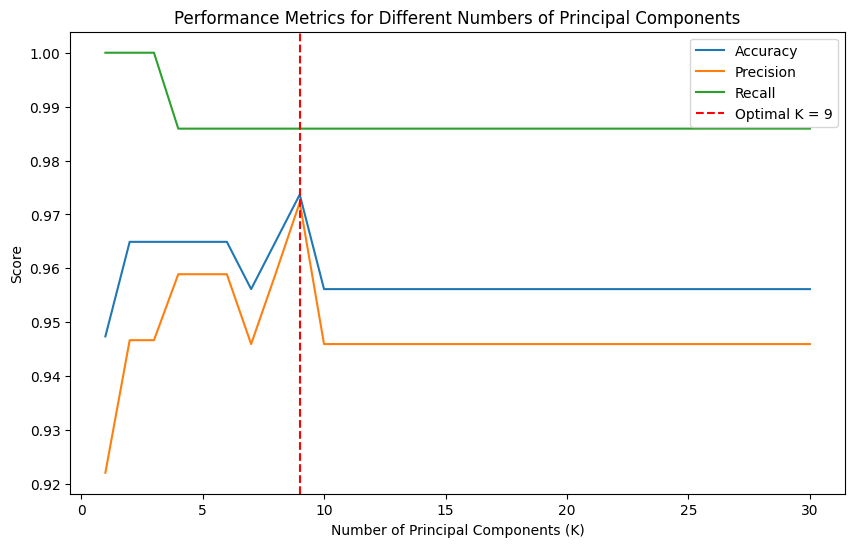

The optimal number of principal components (K) is: 9
Best accuracy achieved with K=9: 0.9737


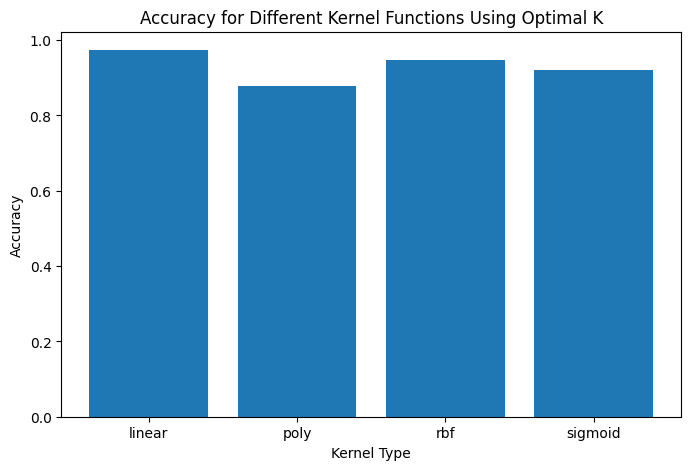

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score


breast = load_breast_cancer()
X = pd.DataFrame(breast.data, columns=breast.feature_names)
y = pd.Series(breast.target)  # target variable indicating malignant or benign


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 1: PCA and Optimal K
accuracies, precisions, recalls = [], [], []
components_range = range(1, X_train.shape[1] + 1)

best_k = 1  # Initialize the best number of components
best_accuracy = 0  # Track the best accuracy for optimal K

for k in components_range:
    # Apply PCA
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM with linear kernel
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train_pca, y_train)

    # Predict and evaluate
    y_pred = svm.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')

    # Store metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    # Update best K if current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Plot accuracy, precision, and recall over different numbers of principal components
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, label='Accuracy')
plt.plot(components_range, precisions, label='Precision')
plt.plot(components_range, recalls, label='Recall')
plt.axvline(best_k, color='red', linestyle='--', label=f'Optimal K = {best_k}')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.legend()
plt.title('Performance Metrics for Different Numbers of Principal Components')
plt.show()

print(f"The optimal number of principal components (K) is: {best_k}")
print(f"Best accuracy achieved with K={best_k}: {best_accuracy:.4f}")

# Part 2: Experiment with Different Kernels using Optimal K
pca = PCA(n_components=best_k)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)
    kernel_accuracies[kernel] = accuracy_score(y_test, y_pred)



# Plot accuracy for different kernel functions
plt.figure(figsize=(8, 5))
plt.bar(kernel_accuracies.keys(), kernel_accuracies.values())
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Kernel Functions Using Optimal K')
plt.show()


SVR Model (Linear Kernel) - MSE: 0.06719503772806892, R^2: 0.6519990126331074


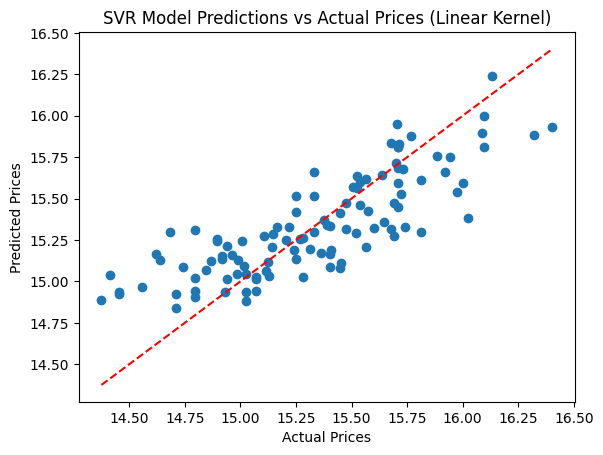

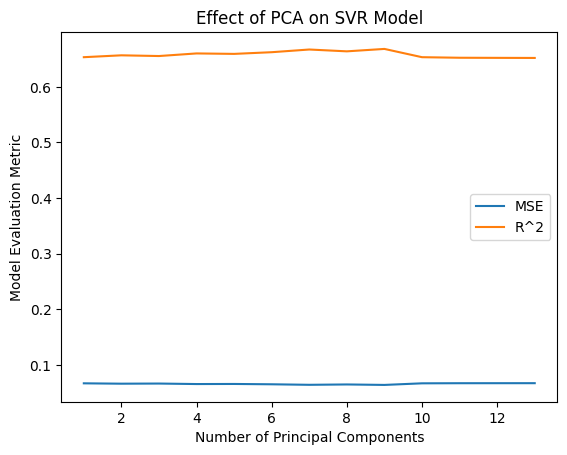

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)
X = data.drop('price', axis=1)
y = data['price']

# Log-transform y to handle skewness
y = np.log1p(y)  # Log transform to reduce skewness

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize target after log-transforming
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Define a simpler SVR model with a linear kernel
svr = SVR(kernel='linear', C=1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Inverse transform predictions for evaluation
y_pred_svr = scaler_y.inverse_transform(y_pred_svr.reshape(-1, 1)).flatten()
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate SVR model
svr_mse = mean_squared_error(y_test_inv, y_pred_svr)
svr_r2 = r2_score(y_test_inv, y_pred_svr)
print(f'SVR Model (Linear Kernel) - MSE: {svr_mse}, R^2: {svr_r2}')

# Plot predictions vs actual values
plt.scatter(y_test_inv, y_pred_svr)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR Model Predictions vs Actual Prices (Linear Kernel)")
plt.show()

# PCA Feature Extraction and SVR Training with PCA-transformed data
pca_mse_scores = []
pca_r2_scores = []
n_components_list = range(1, X_train.shape[1] + 1)

for n in n_components_list:
    pca = PCA(n_components=n)

    # Apply PCA on train and test sets
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train the SVR on PCA-transformed data
    svr.fit(X_train_pca, y_train)
    y_pred_pca = svr.predict(X_test_pca)

    # Inverse transform predictions for evaluation
    y_pred_pca = scaler_y.inverse_transform(y_pred_pca.reshape(-1, 1)).flatten()

    # Calculate performance metrics
    pca_mse = mean_squared_error(y_test_inv, y_pred_pca)
    pca_r2 = r2_score(y_test_inv, y_pred_pca)
    pca_mse_scores.append(pca_mse)
    pca_r2_scores.append(pca_r2)

# Plot PCA results
plt.plot(n_components_list, pca_mse_scores, label='MSE')
plt.plot(n_components_list, pca_r2_scores, label='R^2')
plt.xlabel("Number of Principal Components")
plt.ylabel("Model Evaluation Metric")
plt.legend()
plt.title("Effect of PCA on SVR Model")
plt.show()


SVR Model (linear Kernel) - MSE: 0.06719503772806892, R^2: 0.6519990126331074


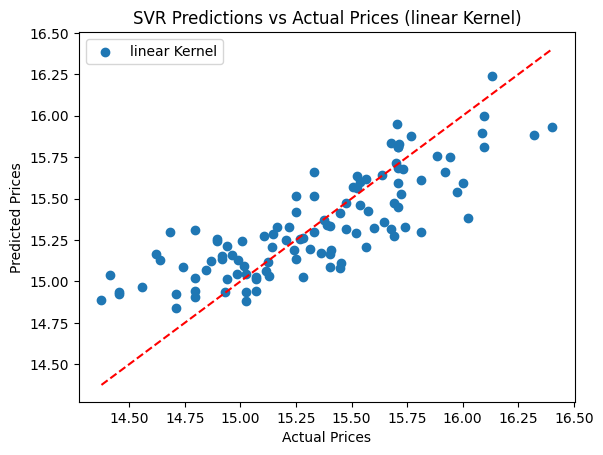

SVR Model (poly Kernel) - MSE: 0.08713129298650658, R^2: 0.5487497735685892


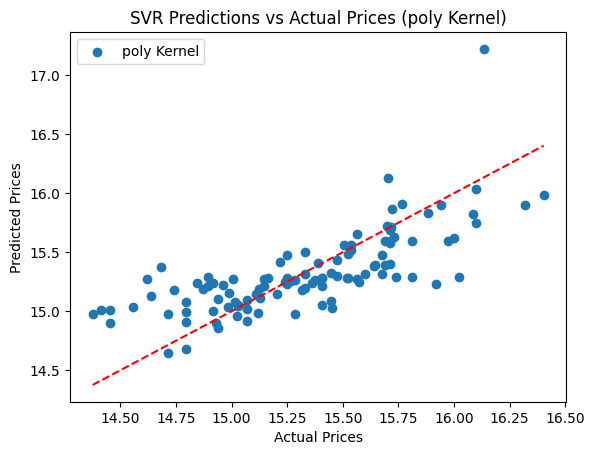

SVR Model (rbf Kernel) - MSE: 0.07346199864997113, R^2: 0.6195426190905128


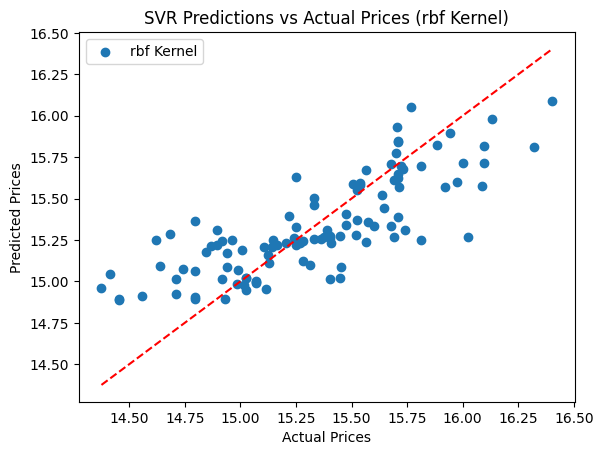

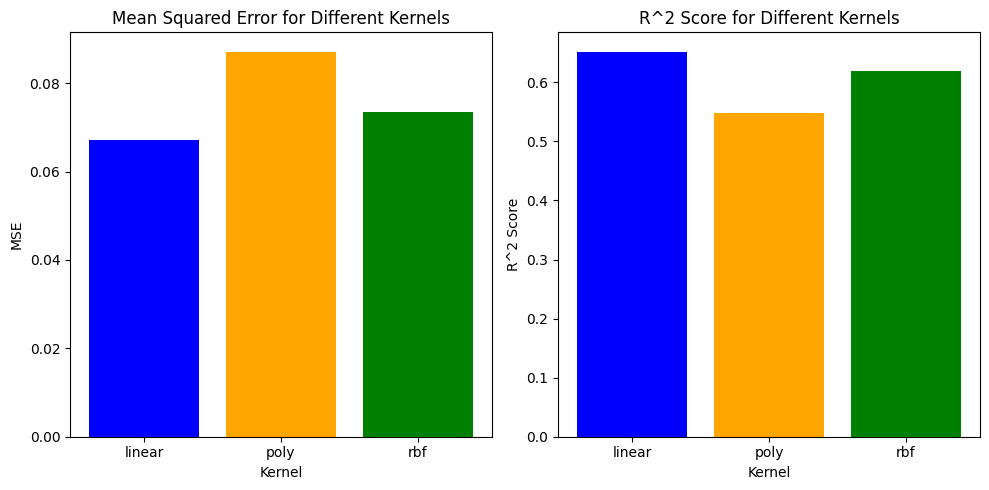

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
data = pd.read_csv(url)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)
X = data.drop('price', axis=1)
y = data['price']


y = np.log1p(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Standardize target after log-transforming
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Define kernels to explore
kernels = ['linear', 'poly', 'rbf']
kernel_results = {}

# Explore different kernels
for kernel in kernels:
    # Initialize and train SVR with current kernel
    svr = SVR(kernel=kernel, C=1)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)

    # Inverse transform predictions for evaluation
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Calculate performance metrics
    mse = mean_squared_error(y_test_inv, y_pred)
    r2 = r2_score(y_test_inv, y_pred)
    kernel_results[kernel] = {'MSE': mse, 'R^2': r2}
    print(f'SVR Model ({kernel} Kernel) - MSE: {mse}, R^2: {r2}')

    # Plot predictions vs actual values for each kernel
    plt.scatter(y_test_inv, y_pred, label=f'{kernel} Kernel')
    plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"SVR Predictions vs Actual Prices ({kernel} Kernel)")
    plt.legend()
    plt.show()

# Plot comparison of MSE and R^2 for different kernels
kernels = list(kernel_results.keys())
mse_scores = [kernel_results[kernel]['MSE'] for kernel in kernels]
r2_scores = [kernel_results[kernel]['R^2'] for kernel in kernels]

plt.figure(figsize=(10, 5))

# MSE Comparison
plt.subplot(1, 2, 1)
plt.bar(kernels, mse_scores, color=['blue', 'orange', 'green'])
plt.xlabel("Kernel")
plt.ylabel("MSE")
plt.title("Mean Squared Error for Different Kernels")

# R^2 Comparison
plt.subplot(1, 2, 2)
plt.bar(kernels, r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel("Kernel")
plt.ylabel("R^2 Score")
plt.title("R^2 Score for Different Kernels")

plt.tight_layout()
plt.show()
